**Multiple Linear Regresion** 
## Bike Sharing Case Study
### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. 
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. They've decided to come up with a mindful business plan to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Essentially, the company wants to understand —


- Which variables are significant in predicting the demand for shared bikes
- How well those variables describe the bike demands


**So interpretation is important!**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [4]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [6]:
path = '/content/drive/MyDrive/colab data/day.csv'
bike = pd.read_csv(path)

In [ ]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [7]:
bike.shape

(730, 16)

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Step 2: Handling Data Types and EDA
Dropping the columns not relevant for model building and checking the data type

In [8]:
# drop casual and registered columns to prevant data redundancy in model as per the data dictionary
bs = bike.drop(['casual','registered'], 1)

In [ ]:
# check the unique values of season column
bs.season.unique()

array([1, 2, 3, 4])

In [9]:
# changing column season data type to categorical as per data dictionary
bs['season'] = bs['season'].map({1:'spring',2:'summer', 3:'fall', 4:'winter'})

In [ ]:
# again check unique values of season
bs.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [ ]:
# check unique values of weathersit column 
bs.weathersit.unique()

array([2, 1, 3])

In [10]:
# map integer values to categorical as per data dictionary in weathersit column
bs['weathersit'] = bs['weathersit'].map({1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',3:' Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'})

In [ ]:
bs.weathersit.unique()

array(['Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'Clear, Few clouds, Partly cloudy, Partly cloudy',
       ' Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'],
      dtype=object)

In [ ]:
# check first 5 rows
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,0,1,0,1,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,0,1,0,2,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,0,1,0,3,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,0,1,0,4,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,0,1,0,5,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
# view the statistical description of data
bs.describe()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,6.526027,0.028767,2.995890,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,210.877136,0.500343,3.450215,0.167266,2.000339,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,183.250000,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,365.500000,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,547.750000,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,730.000000,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


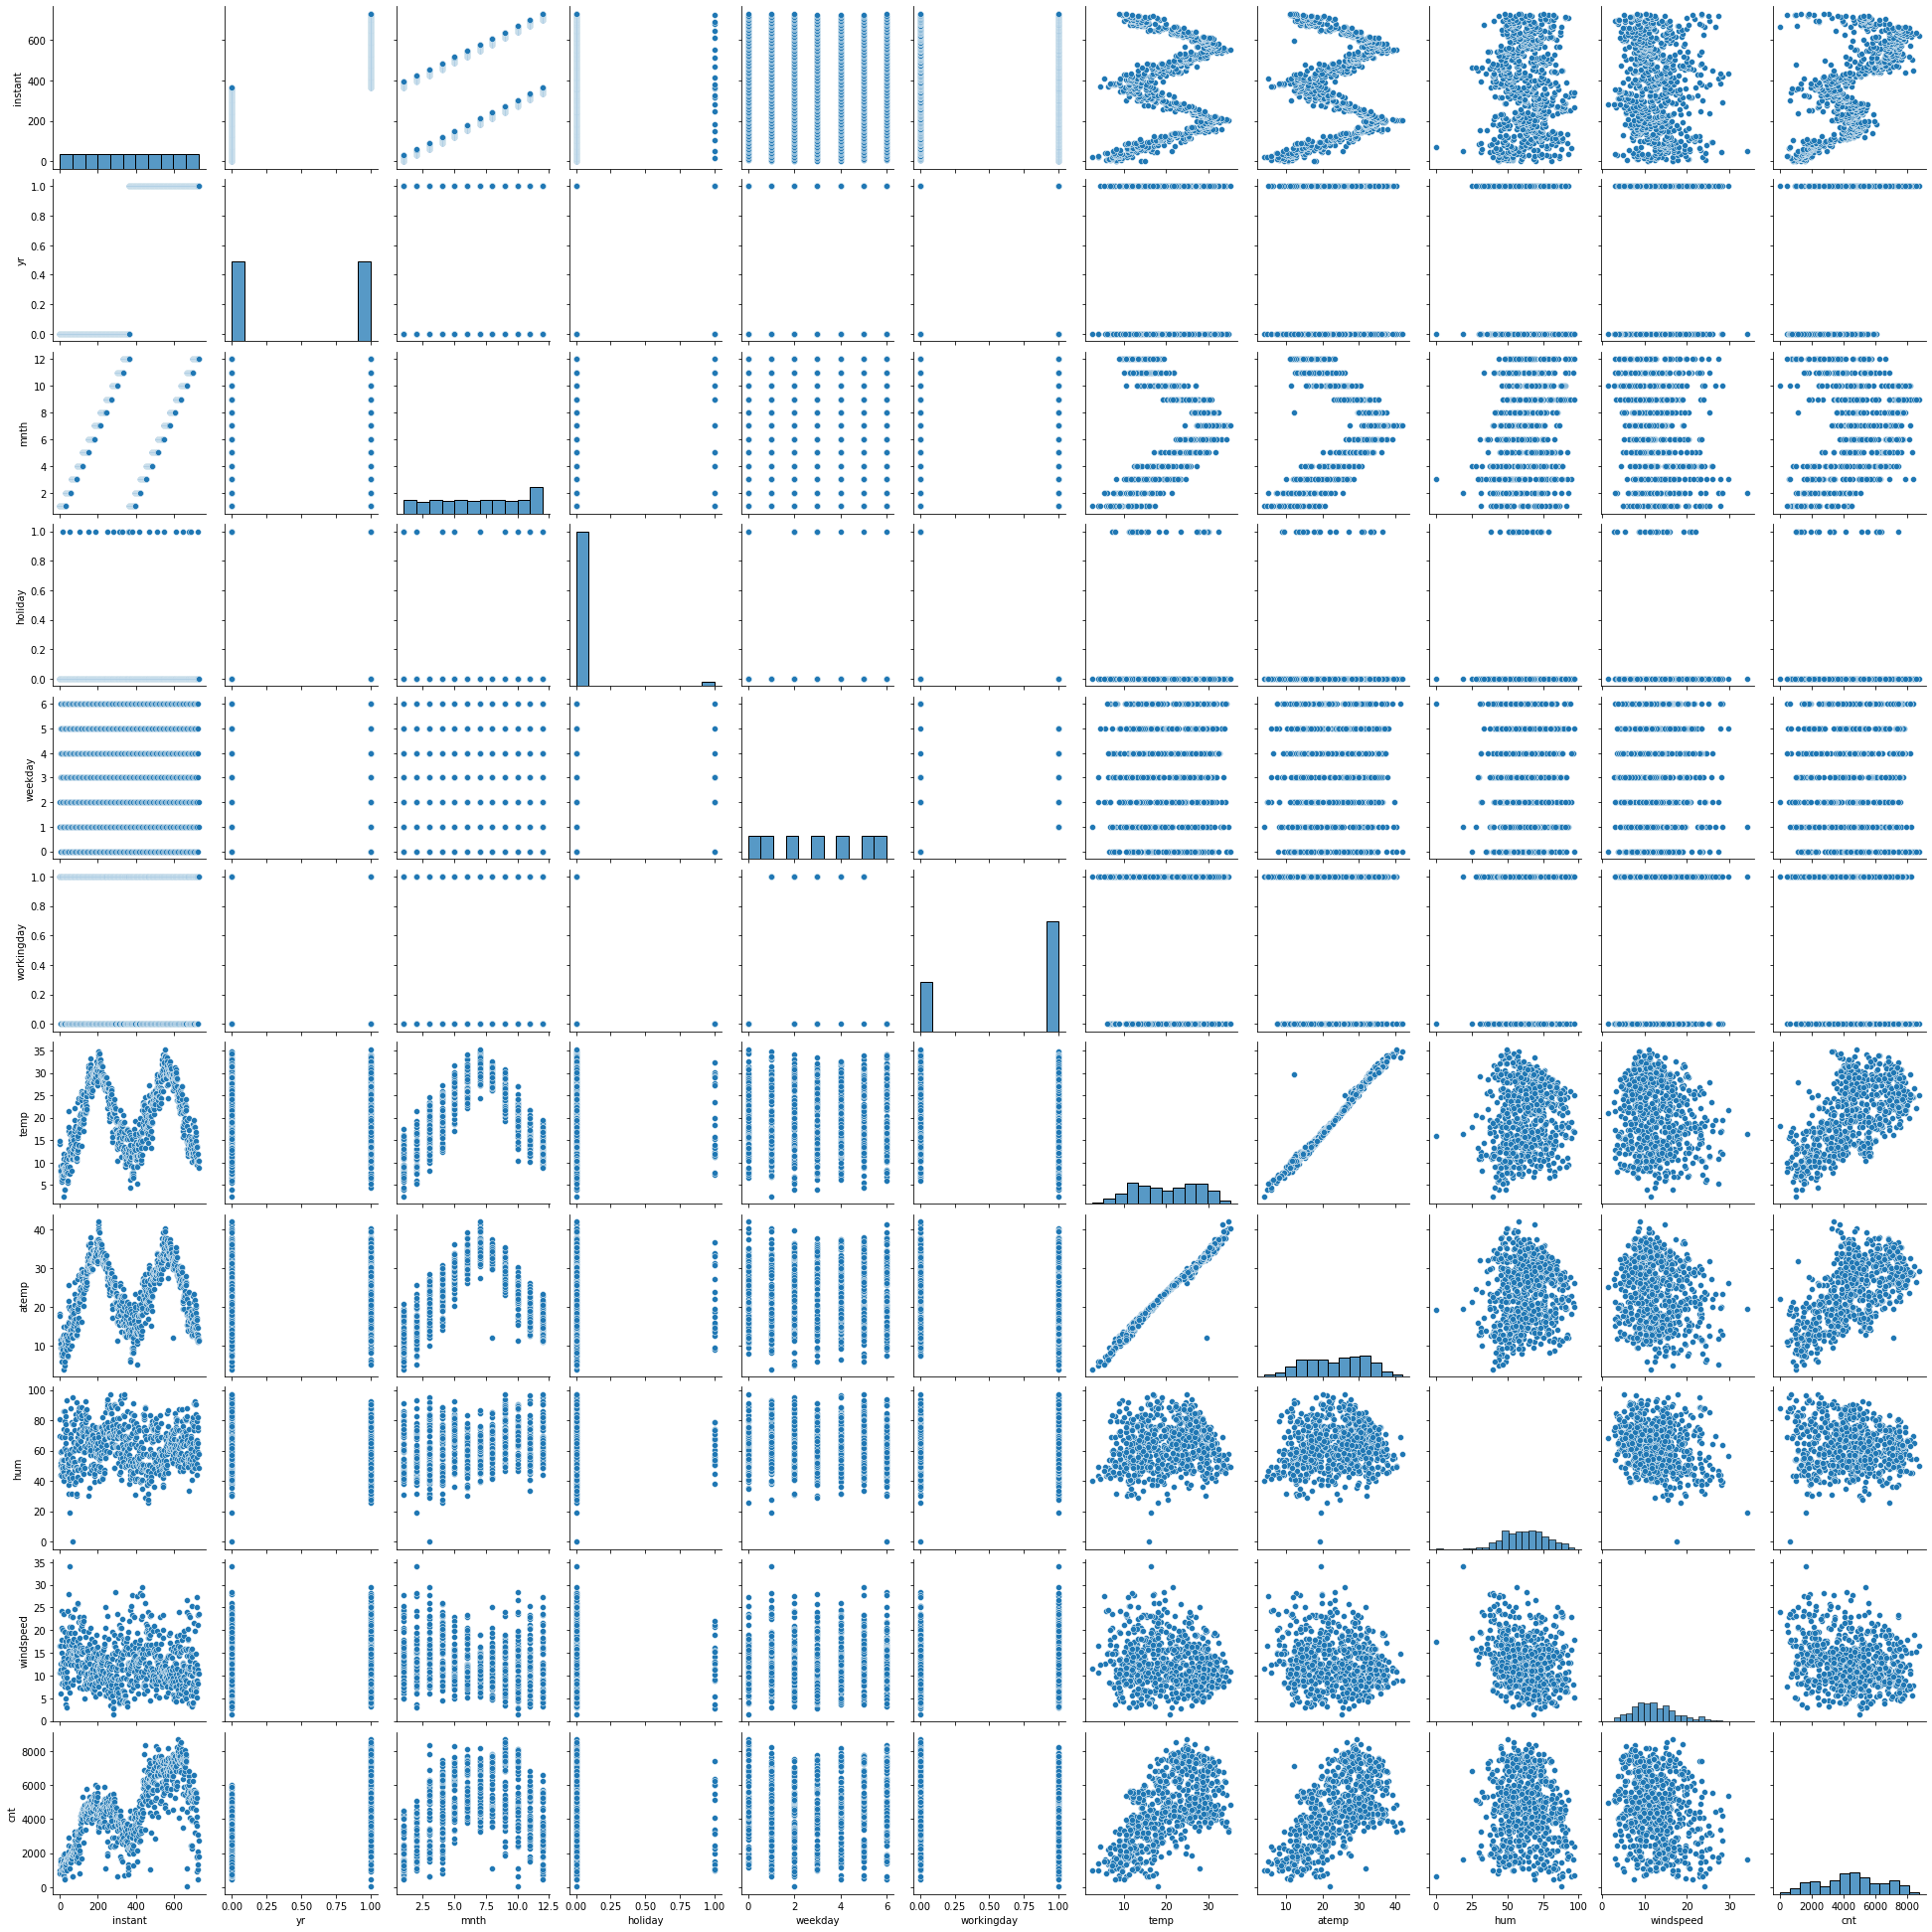

In [ ]:
# visualize the data to glance correlation
sns.pairplot(bs)
plt.show()

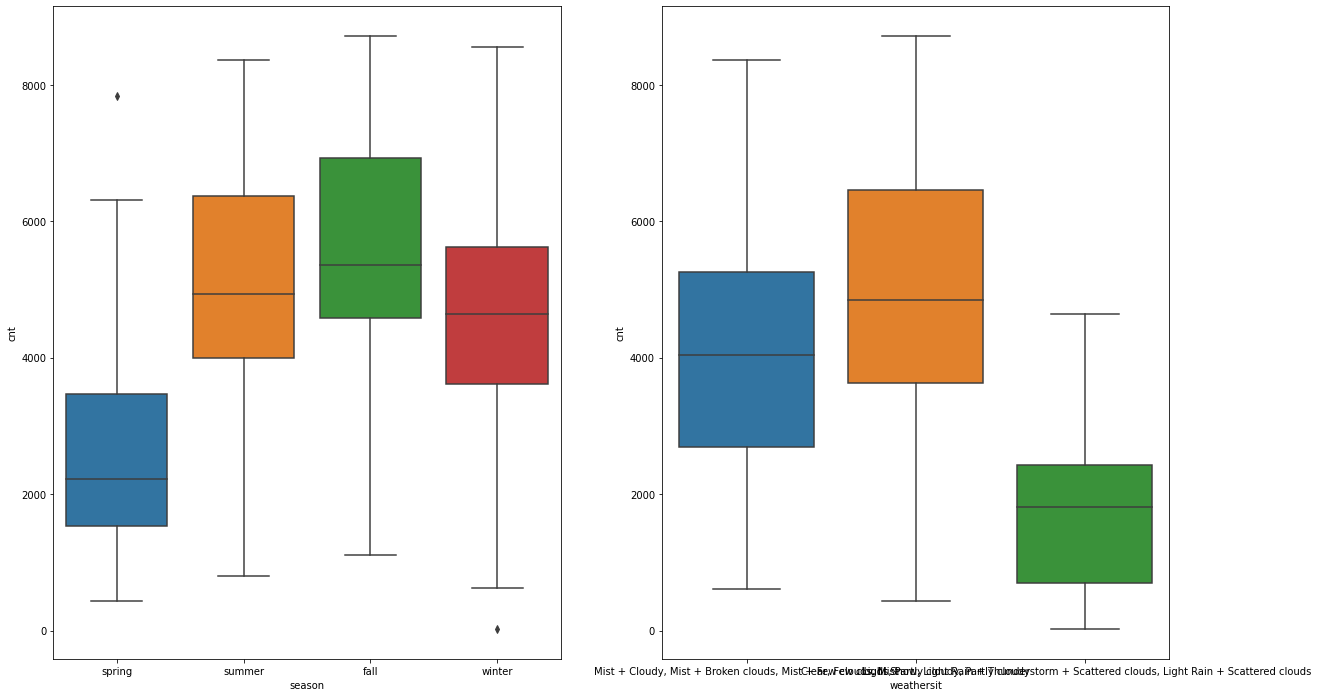

In [ ]:
# visualizing the categorical variable
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x='season', y='cnt', data = bs)

plt.subplot(1,2,2)
sns.boxplot(x='weathersit', y='cnt', data= bs)
plt.show()

We should consider linear regression as there seem  some correlations with the targaet variable and other variable as well.
We also drop columns that are not relevant for the model building.

In [11]:
#  drop irrelevant columns 
bs = bs.drop(['instant','dteday'], axis=1)

### Handling Missing Values
treat missing values if any

In [ ]:
# check the presence of null values in data
bs.isnull().sum()

yr                                                              0
mnth                                                            0
holiday                                                         0
weekday                                                         0
workingday                                                      0
temp                                                            0
atemp                                                           0
hum                                                             0
windspeed                                                       0
cnt                                                             0
spring                                                          0
summer                                                          0
winter                                                          0
Clear, Few clouds, Partly cloudy, Partly cloudy                 0
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist    0
dtype: int

Data has no missing values

### Handling Outliers
identifying and removing extreme values

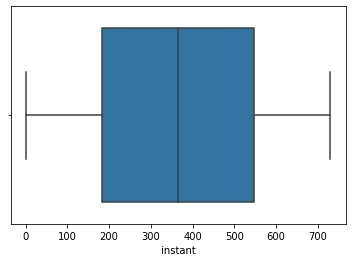

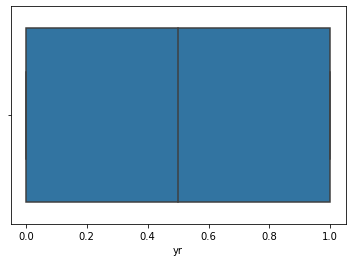

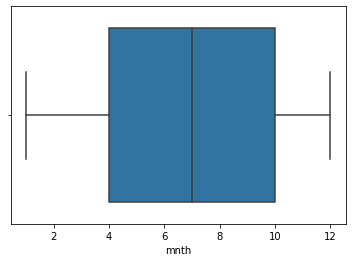

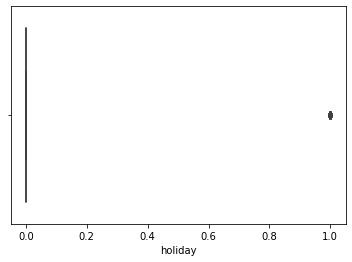

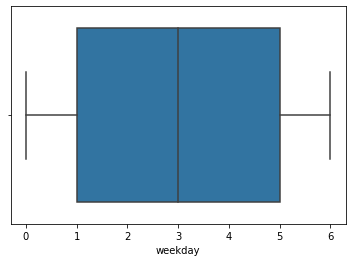

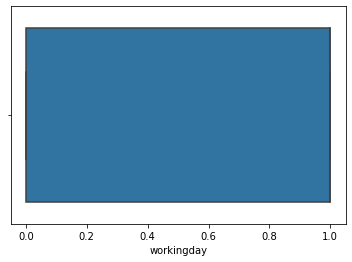

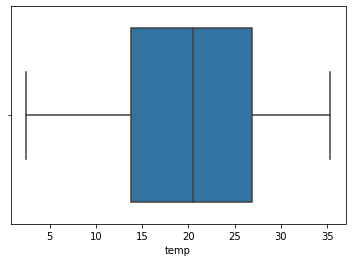

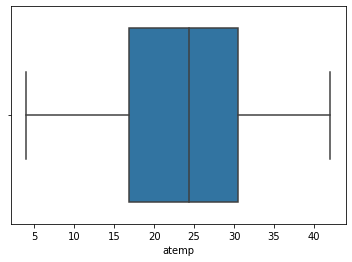

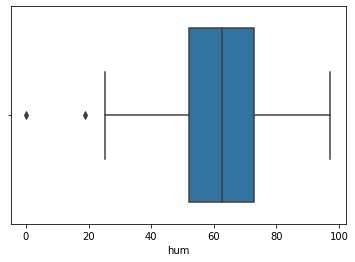

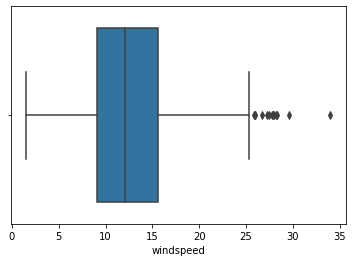

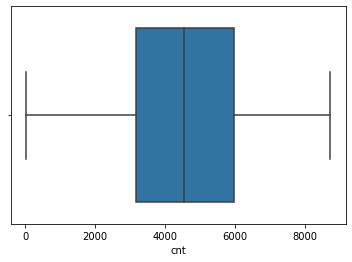

In [ ]:
# check outliers in numerical columns
numerical_features=[feature for feature in bs.columns if bs[feature].dtypes!='object']
for feature in numerical_features:
    if feature=='class(target)':
        pass
    else:
    
        sns.boxplot(bs[feature])
        plt.show()

### Univariate Analysis

Plot of instant


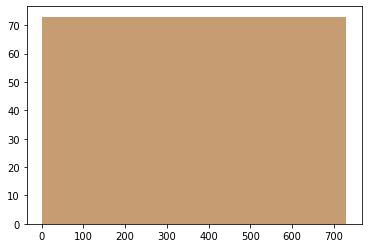

------------------------------------------------------------------------
Plot of dteday


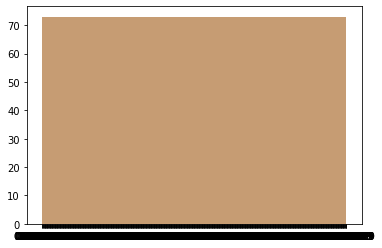

------------------------------------------------------------------------
Plot of season


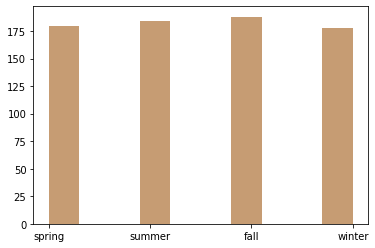

------------------------------------------------------------------------
Plot of yr


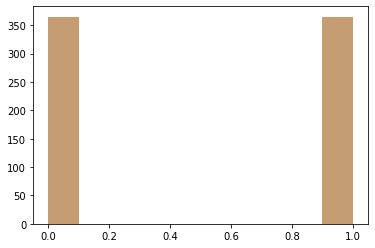

------------------------------------------------------------------------
Plot of mnth


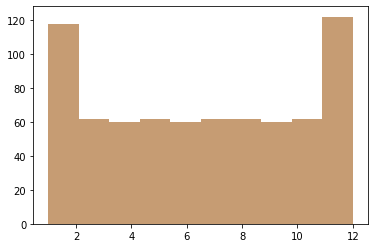

------------------------------------------------------------------------
Plot of holiday


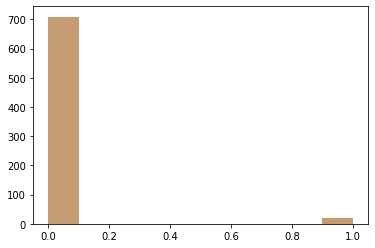

------------------------------------------------------------------------
Plot of weekday


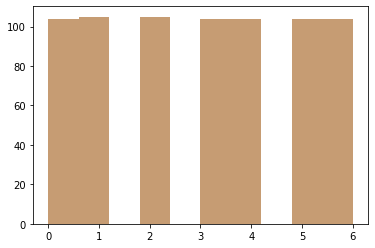

------------------------------------------------------------------------
Plot of workingday


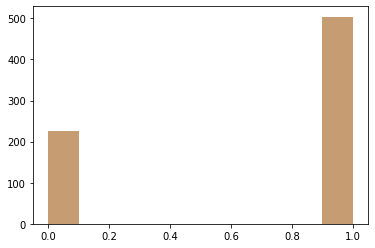

------------------------------------------------------------------------
Plot of weathersit


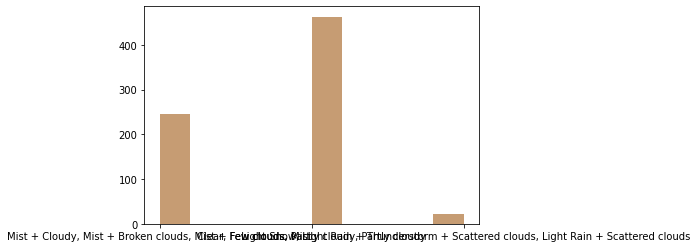

------------------------------------------------------------------------
Plot of temp


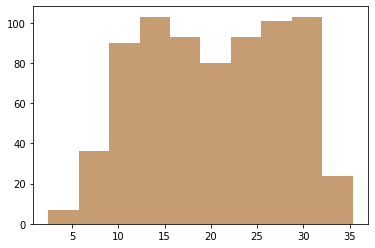

------------------------------------------------------------------------
Plot of atemp


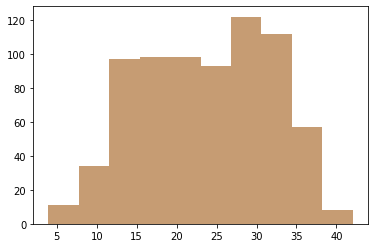

------------------------------------------------------------------------
Plot of hum


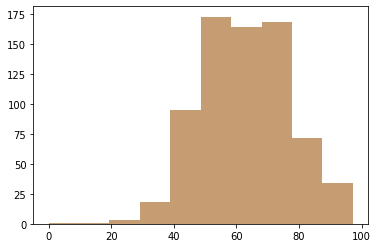

------------------------------------------------------------------------
Plot of windspeed


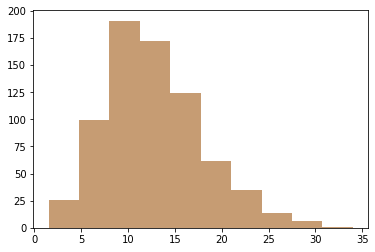

------------------------------------------------------------------------
Plot of cnt


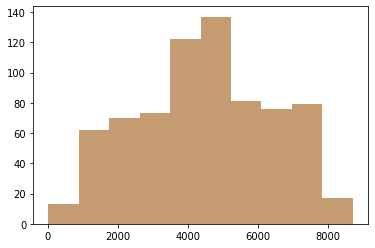

------------------------------------------------------------------------


In [ ]:
# plot histogram
for column in bs:
    title = "Plot of "+column
    print(title)
    plt.hist(bs[column], alpha=0.5, label='0')
    plt.hist(bs[column], alpha=0.5, label='1')
    plt.show()
   
    plt.show()
    print("------------------------------------------------------------------------")

### Bivariate Analysis

Plot of season


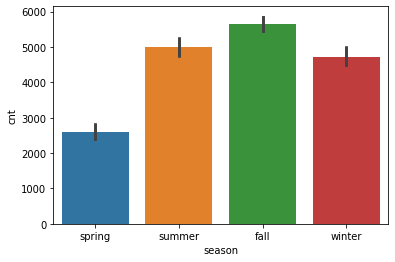

------------------------------------------------------------------------
Plot of yr


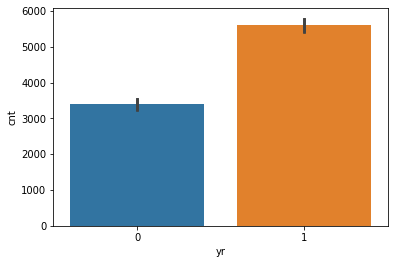

------------------------------------------------------------------------
Plot of mnth


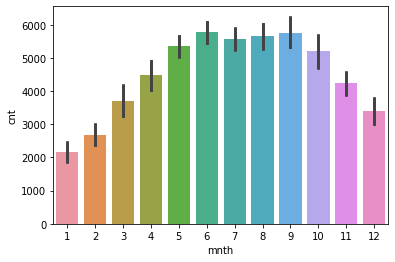

------------------------------------------------------------------------
Plot of holiday


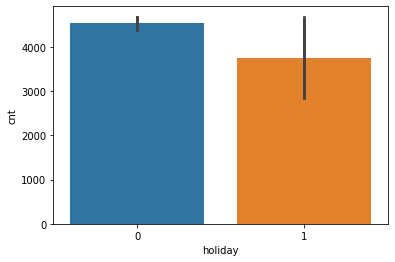

------------------------------------------------------------------------
Plot of weekday


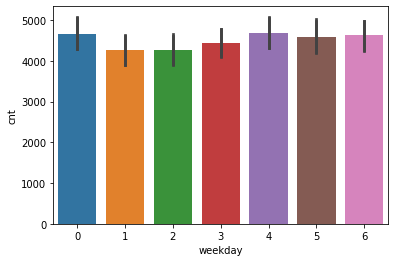

------------------------------------------------------------------------
Plot of workingday


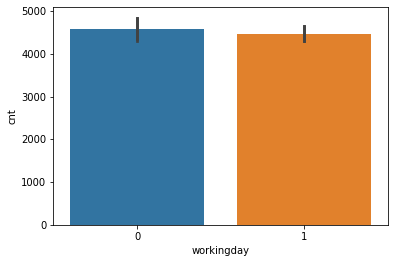

------------------------------------------------------------------------
Plot of weathersit


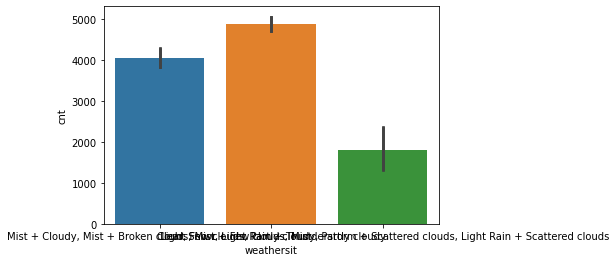

------------------------------------------------------------------------
Plot of temp


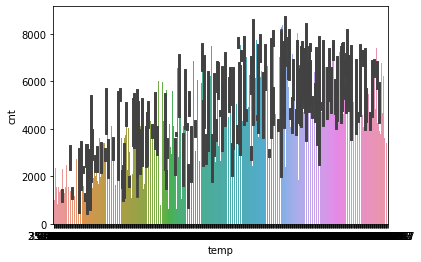

------------------------------------------------------------------------
Plot of atemp


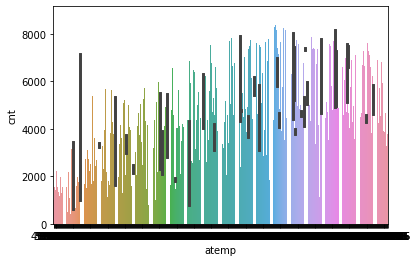

------------------------------------------------------------------------
Plot of hum


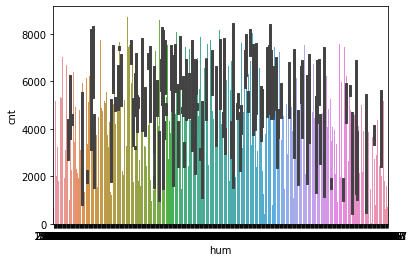

------------------------------------------------------------------------
Plot of windspeed


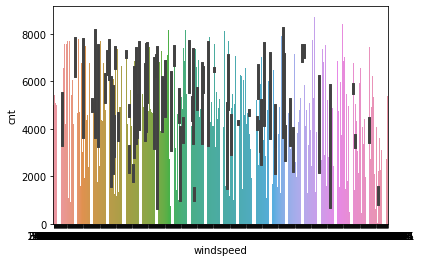

------------------------------------------------------------------------
Plot of cnt


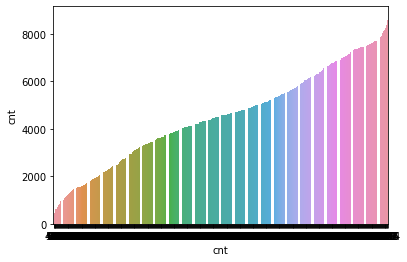

------------------------------------------------------------------------


In [ ]:
# plot barplot for summarising the frequency of cnt agsinst different columns
for column in bs:
    title = "Plot of "+column
    print(title)
    sns.barplot(x=column,y='cnt', data=bs)
    sns.barplot(x=column,y='cnt', data=bs)
    plt.show()
   
    plt.show()
    print("------------------------------------------------------------------------")

## Step 3: Preparing Data for Modeling
Encoding categorical variables to dummay variables

In [12]:
# create dummay variables
bs_season = pd.get_dummies(bs['season'],drop_first=True)
bs_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [13]:
# concatthe dummayset to the data
bs = pd.concat([bs, bs_season], axis=1)
bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,1,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,2,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,3,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,4,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,5,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [14]:
# dropping the season as it is of no use for further analysis
bs.drop('season',axis=1,inplace = True)

In [15]:
# creat a dummay set for wearthersit column
bs_weather = pd.get_dummies(bs.weathersit, drop_first = True)
bs_weather

,"Clear, Few clouds, Partly cloudy, Partly cloudy","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
725,0,1
726,0,1
727,0,1
728,1,0


In [16]:
# concate dummayset to the data
bs = pd.concat([bs, bs_weather], axis=1)

In [17]:
# drop categorical column
bs = bs.drop('weathersit', axis=1)

In [ ]:
bs.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,"Clear, Few clouds, Partly cloudy, Partly cloudy","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0
3,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0
4,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0


To maintain the drevity drop columns not required for further analysis

### Splitting data into train and test set


In [18]:
# importing libraries
import sklearn 
from sklearn.model_selection import train_test_split 

import warnings 
warnings.filterwarnings('ignore')

In [19]:
# split data into train and test
bs_train, bs_test =train_test_split(bs, train_size = 0.7, random_state = 100)
print(bs_train.shape)
print(bs_test.shape)

(510, 15)
(220, 15)


### Resacling the Features 
Rescaling is required for multiple linearn regression model to have comparable scale for interpretation and optimization of model. 
In our data set there are not very extreme data points hence using min-max scaling

In [20]:
# normalize the train set
# import minmaxscaler
from sklearn.preprocessing import MinMaxScaler

In [21]:
# instantiate an object
scaler = MinMaxScaler()

In [22]:
# create a list of numerical variables
num_vars = ['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt']

In [23]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables  
bs_train[num_vars] = scaler.fit_transform(bs_train[num_vars])
bs_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,"Clear, Few clouds, Partly cloudy, Partly cloudy","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
576,1.0,0.545455,0.0,0.500000,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0
426,1.0,0.181818,0.0,0.000000,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1
728,1.0,1.000000,0.0,0.166667,1.0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0
482,1.0,0.272727,0.0,0.000000,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1
111,0.0,0.272727,0.0,0.000000,0.0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,1


## Step 4: Training the Model 


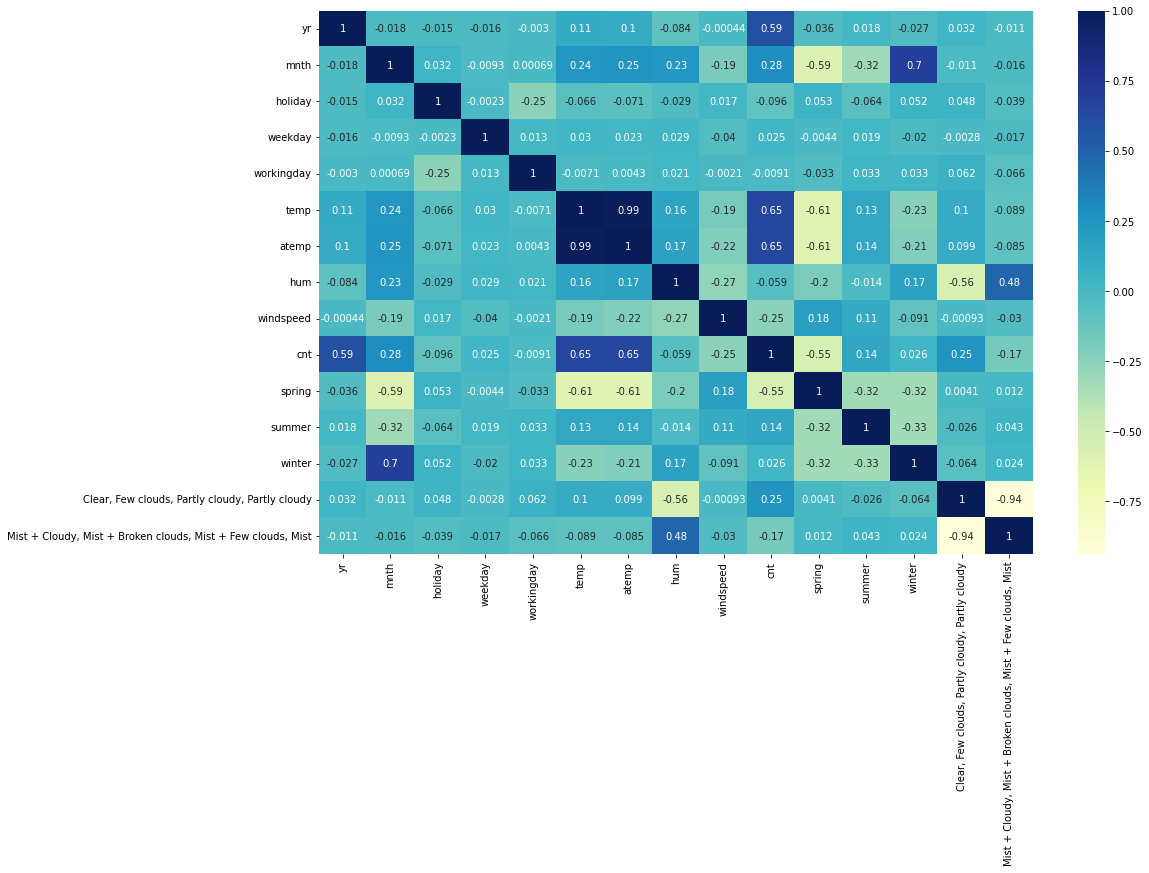

In [24]:
# check the correlation via heatmap
plt.figure(figsize=(16,10))
sns.heatmap(bs_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Dividing into X and Y sets for the model building

In [25]:
# construct X_train and y_train
y_train = bs_train.pop('cnt')
X_train = bs_train

## Step 5: Building a Multiple Linear Regression model

Fit a regression line through the training data using `statsmodels`.

In [26]:
# import statsmodel
import statsmodels.api as sm 

X_train_lm = sm.add_constant(X_train)

# first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [27]:
# check the params obtained
lr.params

const                                                           0.047136
yr                                                              0.231246
mnth                                                            0.017524
holiday                                                        -0.101170
weekday                                                         0.017627
workingday                                                     -0.019871
temp                                                            0.431895
atemp                                                           0.062511
hum                                                            -0.138185
windspeed                                                      -0.178399
spring                                                         -0.070143
summer                                                          0.046762
winter                                                          0.081018
Clear, Few clouds, Partly cloudy, Partly cloudy    

In [28]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     171.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.41e-179
Time:                        10:32:00   Log-Likelihood:                 489.42
No. Observations:                 510   AIC:                            -948.8
Df Residuals:                     495   BIC:                            -885.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

In [29]:
# Check for the VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,382.05
6,atemp,367.35
7,hum,26.71
12,"Clear, Few clouds, Partly cloudy, Partly cloudy",15.55
1,mnth,13.14
13,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",9.13
9,spring,6.12
8,windspeed,4.96
11,winter,4.85
4,workingday,3.75


### Dropping the variable and updating the model

In [31]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('atemp', 1,)

In [32]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [33]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.0
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.12e-180
Time:                        10:33:30   Log-Likelihood:                 489.32
No. Observations:                 510   AIC:                            -950.6
Df Residuals:                     496   BIC:                            -891.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [34]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,26.70
5,temp,20.67
11,"Clear, Few clouds, Partly cloudy, Partly cloudy",15.53
1,mnth,13.14
12,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",9.13
8,spring,6.07
10,winter,4.72
7,windspeed,4.69
4,workingday,3.74
3,weekday,3.20


In [35]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth', 1)

In [36]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [37]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.6
Date:                Tue, 10 May 2022   Prob (F-statistic):          9.69e-182
Time:                        10:33:41   Log-Likelihood:                 489.09
No. Observations:                 510   AIC:                            -952.2
Df Residuals:                     497   BIC:                            -897.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [38]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('weekday', 1)

In [39]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [40]:
# Print the summary of the model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.3
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.62e-182
Time:                        10:33:48   Log-Likelihood:                 488.13
No. Observations:                 510   AIC:                            -952.3
Df Residuals:                     498   BIC:                            -901.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [41]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,24.37
3,temp,20.15
9,"Clear, Few clouds, Partly cloudy, Partly cloudy",14.30
10,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",8.73
6,spring,5.03
5,windspeed,4.62
2,workingday,3.73
8,winter,3.63
7,summer,2.55
0,yr,2.09


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 6: Residual Analysis of the train data

In [42]:
y_train_cnt = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

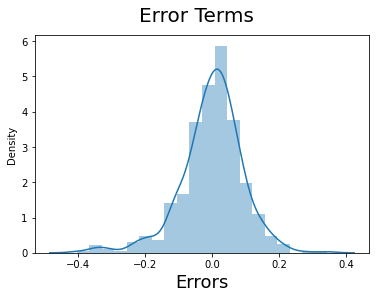

In [43]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [44]:
num_vars = ['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt']

bs_test[num_vars] = scaler.transform(bs_test[num_vars])

In [ ]:
bs_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,"Clear, Few clouds, Partly cloudy, Partly cloudy","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.499174,0.036364,0.516667,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.654545,0.318182
std,0.500809,0.311120,0.187620,0.342307,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.476601,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [45]:
y_test = bs_test.pop('cnt')
X_test = bs_test

In [46]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [47]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["atemp", "mnth", "weekday"], axis = 1)

In [48]:
# Making predictions using the fourth model

y_pred_m4 = lr_4.predict(X_test_m4)

## Step 8: Model Evaluation

Let's calculate r2_score and plot the graph for actual versus predicted values.

In [49]:
from sklearn.metrics import r2_score

# R square for test dataset
r2_score(y_test, y_pred_m4)

0.8090660456980198

In [50]:
# R square for train dataset
r2_score(y_train, y_train_cnt)

0.8282469573914324

Text(0, 0.5, 'y_pred')

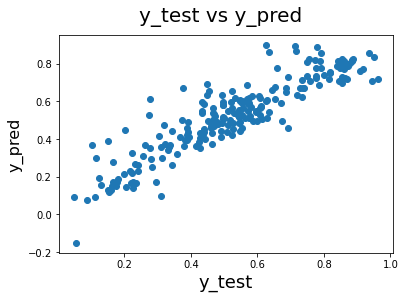

In [51]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

Overall we have a decent model, but we also acknowledge that we could do better. 

